In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

from unidecode import unidecode

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from listes import *

In [2]:
from mydataviz import *

In [3]:
# Chargement du dataset complet (317661, 28)
#data = pd.read_csv('./data/data_clean.csv', low_memory=False)

In [4]:
# Création d'un extrait du dataset pour charger et expérimenter plus rapidement
#data_petit = data.iloc[np.random.randint(0, len(data), 50000)]
#data_petit.to_csv("./data/data_clean_petit.csv")

In [5]:
# Chargement du dataset version réduite (50000 valeurs pour les tests)
data = pd.read_csv("./data/data_clean_petit.csv", low_memory=False)

In [6]:
#data.loc[data['carbohydrates_100g']<0] = 0

In [7]:
listeColFloat = data.dtypes[data.dtypes != 'object'][3:].index.tolist()

In [8]:
print("Fichier de dimension " + str(data.shape) + " :\n")

print("\n\nType des colonnes :")
print(data.dtypes.to_markdown())

print("\n\nTaux de remplissage (%) :")
print(((1- data.isna().mean())*100).to_markdown())

print("\n\nNombre de valeurs uniques par colones :")
print(data.nunique().to_markdown())

Fichier de dimension (50000, 29) :



Type des colonnes :
|                                            | 0       |
|:-------------------------------------------|:--------|
| Unnamed: 0.1                               | int64   |
| Unnamed: 0                                 | int64   |
| code                                       | int64   |
| product_name                               | object  |
| image_url                                  | object  |
| categories                                 | object  |
| ingredients_text                           | object  |
| additives_n                                | float64 |
| additives                                  | object  |
| additives_tags                             | object  |
| ingredients_from_palm_oil_n                | float64 |
| ingredients_from_palm_oil_tags             | object  |
| ingredients_that_may_be_from_palm_oil_n    | float64 |
| ingredients_that_may_be_from_palm_oil_tags | object  |
| nutrition_grade_fr          

<AxesSubplot: >

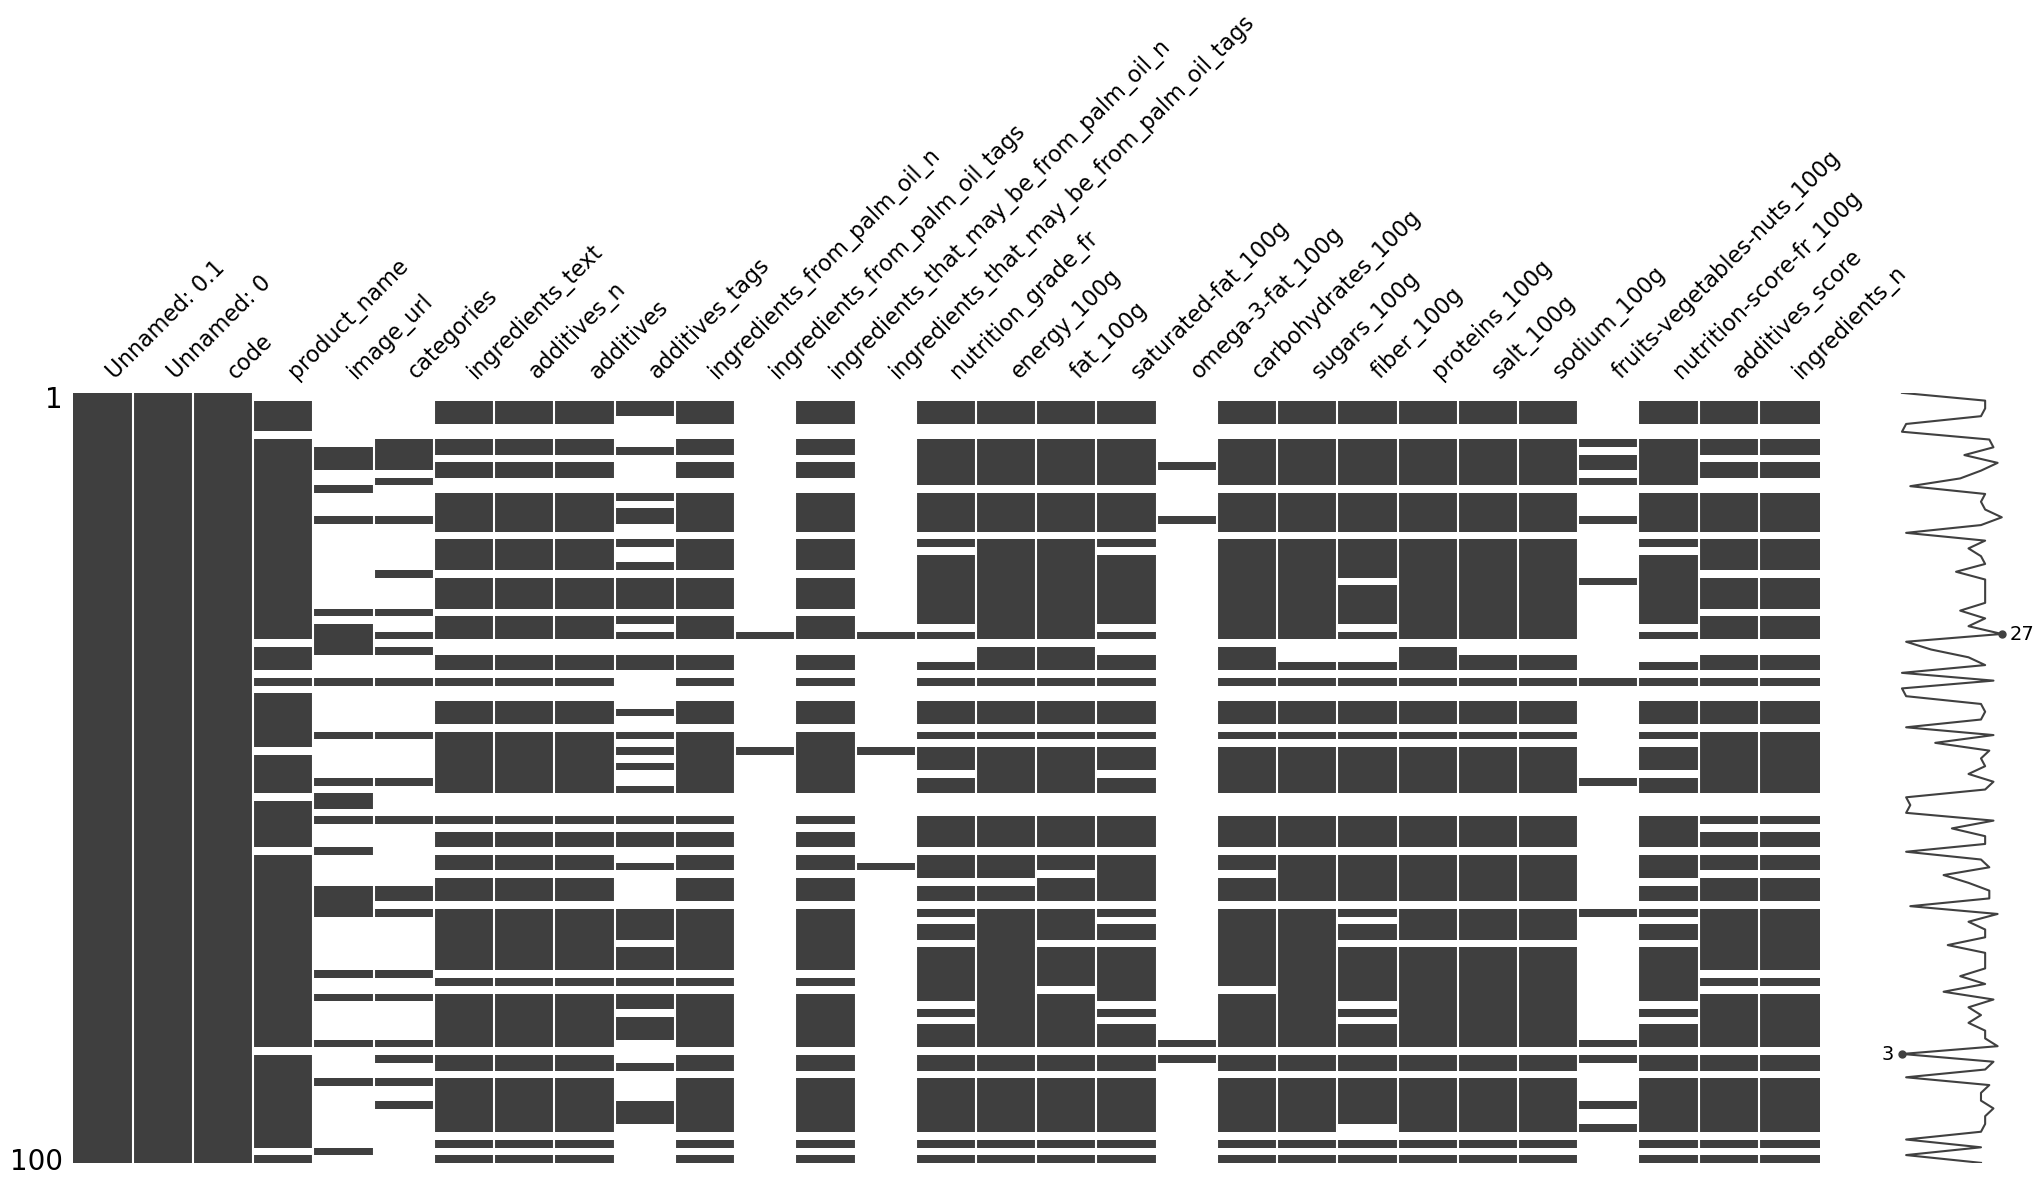

In [9]:
msno.matrix(data[:100])

# Univarié

In [10]:
txt = ' '.join(data['product_name'].astype(str).fillna(''))

In [11]:
tmp = DataSet.make_dataset(txt, 'txt')

In [12]:
wc = tmp.normalise().wordcloud(stopwords=STOPWORDS, width=900, height=600, max_font_size=120, background_color="white")

In [13]:
sns.set(rc={"figure.figsize":(18, 12)})

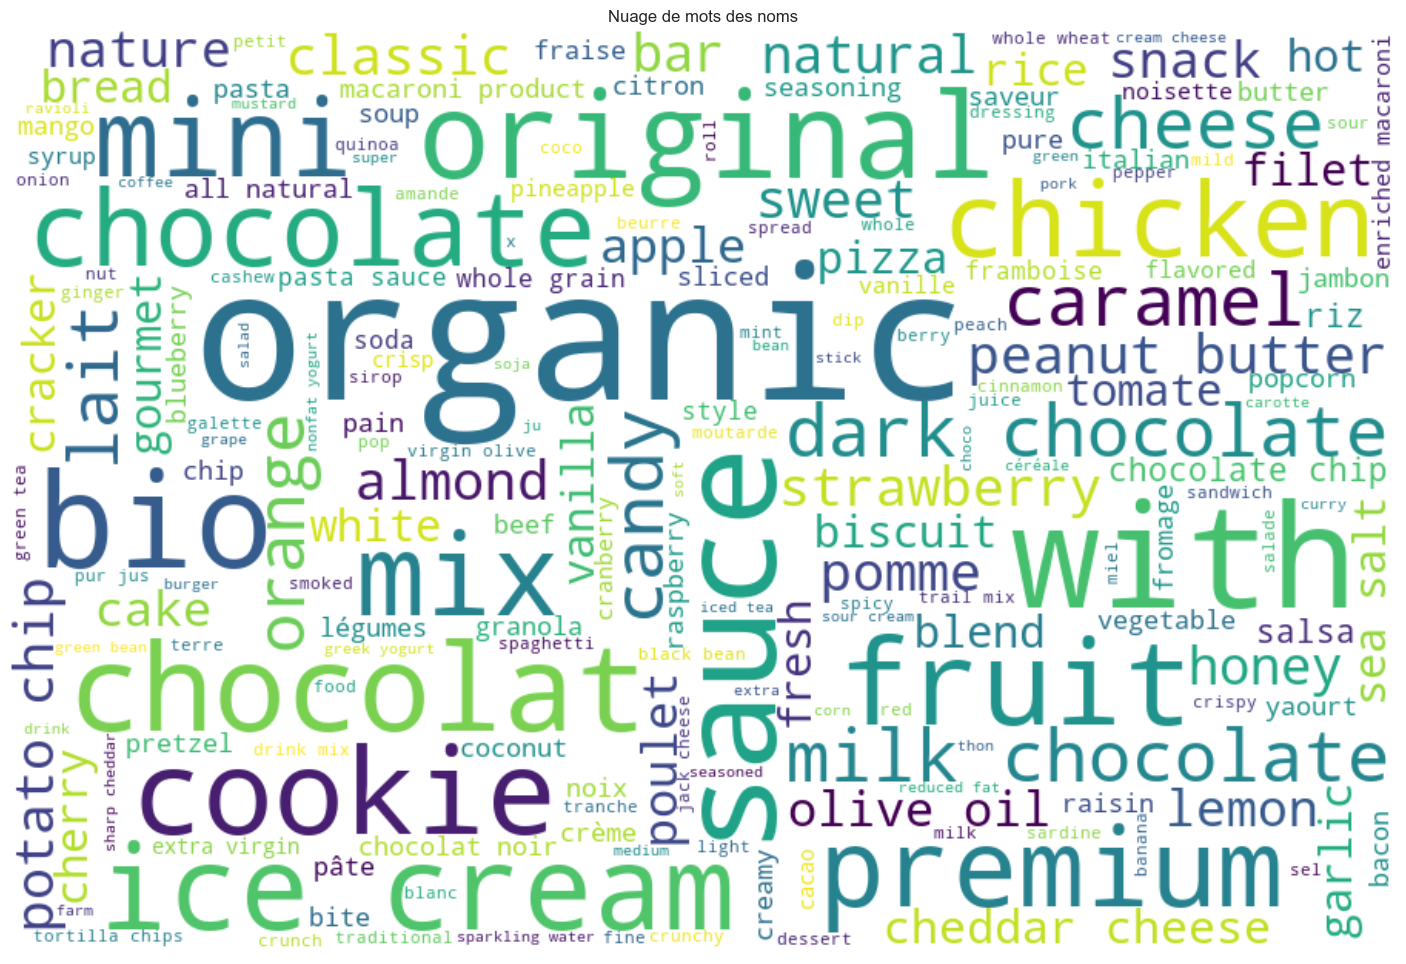

In [14]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots des noms")
plt.show()

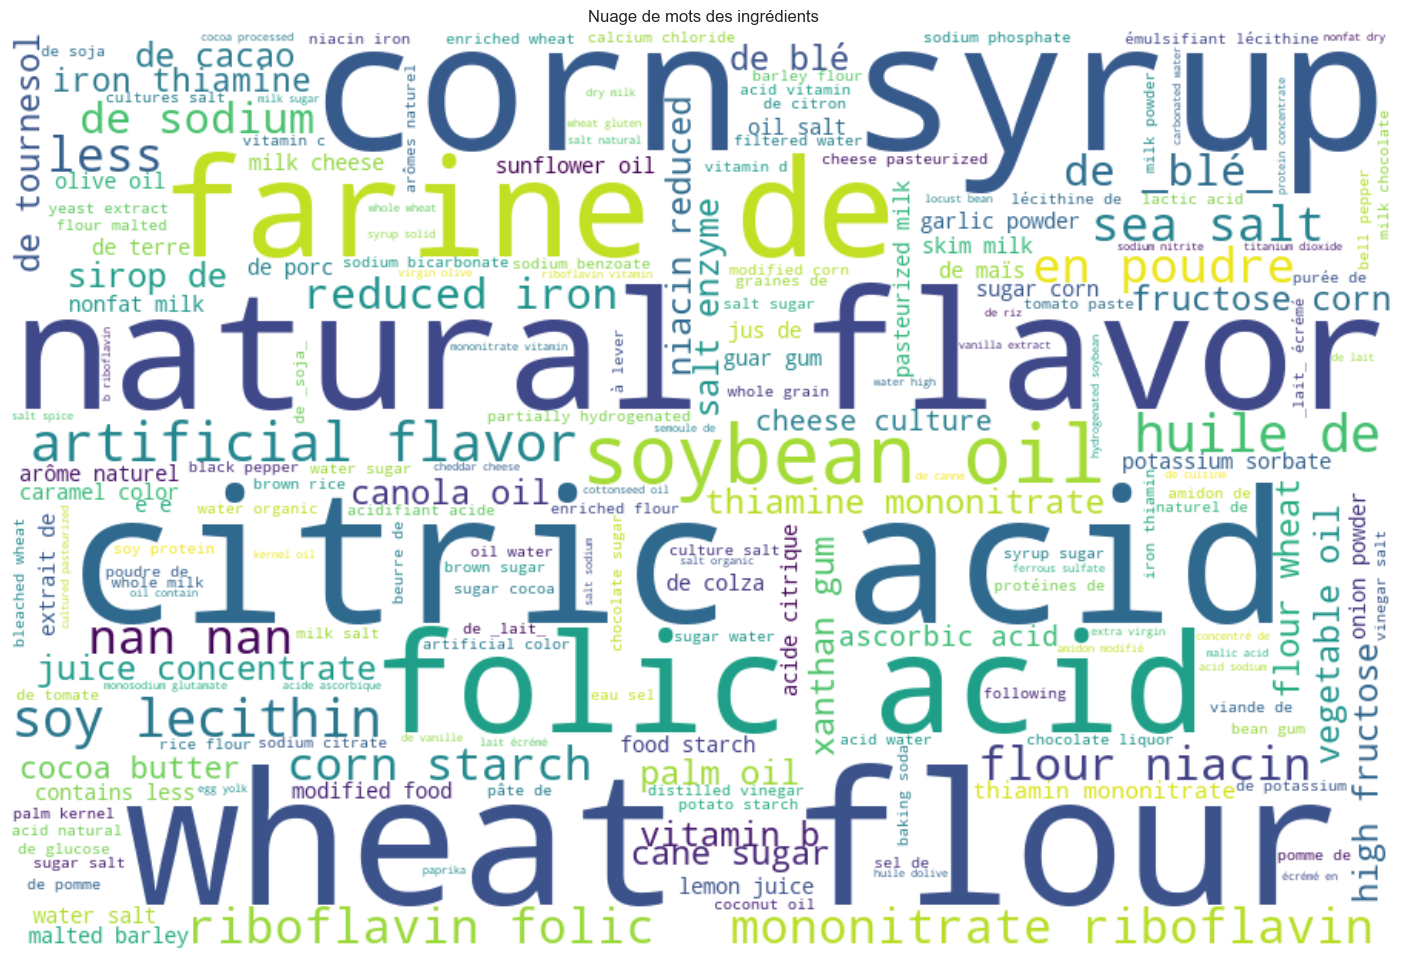

In [15]:
txt = ' '.join(data['ingredients_text'].astype(str).fillna(''))

tmp = DataSet.make_dataset(txt, 'txt')

wc = tmp.normalise().wordcloud(width=900, height=600, max_font_size=120, background_color="white")

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots des ingrédients")
plt.show()

In [16]:
data['categories'].value_counts()[:10]

One-dish meals           862
Biscuits and cakes       742
Sweets                   722
Cheese                   650
Non-sugared beverages    630
Cereals                  624
Dressings and sauces     555
Processed meat           533
Milk and yogurt          515
Alcoholic beverages      468
Name: categories, dtype: int64

In [17]:
tmp = data['categories'].value_counts()[:30]

In [18]:
def plot_piechart(data, limit=None):
    tmp = data.value_counts()
    
    if limit is not None:
        tmp = tmp[:limit]

    palette_color = sns.color_palette('bright')

    # plotting data on chart
    plt.pie(tmp.values, labels=tmp.index, colors=palette_color, autopct='%.0f%%')

    # displaying chart
    plt.show()


def plot_barchartcat(data, limit=None):
    tmp = data.value_counts()
    
    if limit is not None:
        tmp = tmp[:limit]

    print(tmp.values)
    print(list(tmp.index))
    sns.displot(tmp.values, x=list(tmp.index), kind="hist")

In [19]:
sns.set(rc={"figure.figsize":(10, 6)})

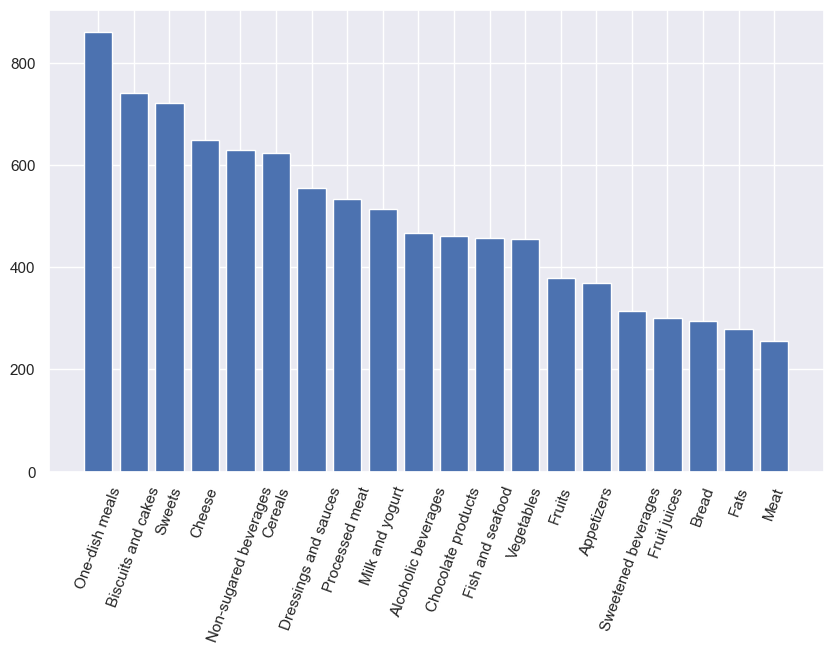

In [20]:
tmp = data['categories'].value_counts()[:20]

plt.bar(list(tmp.index), tmp.values)

plt.xticks(rotation=70)

plt.show()

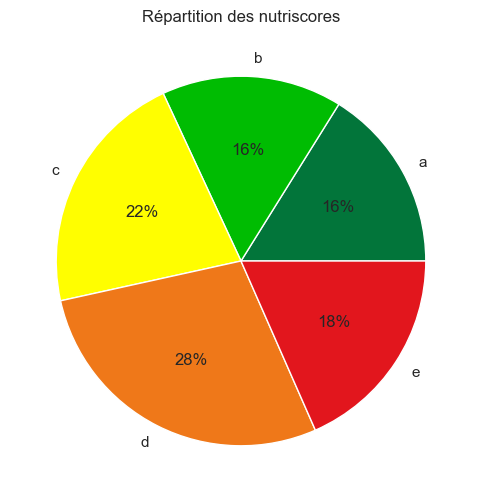

In [21]:
tmp = data['nutrition_grade_fr'].value_counts()

tmp = tmp.reindex(['a', 'b', 'c', 'd', 'e'])


palette_color = sns.color_palette('bright')

plt.pie(tmp.values, labels=tmp.index, colors=['#02753a', '#00bc02', '#fffe00', '#ef7819', '#e2161d'], autopct='%.0f%%')
plt.title("Répartition des nutriscores")
plt.show()

In [22]:
tmp = data['additives_tags'].str.split(',', expand = True).stack().str.replace('en:', '')
tmp

1      0    e375
       1    e101
2      0    e301
       1    e300
       2    e101
            ... 
49986  1    e102
       2    e133
       3    e171
49994  0    e509
       1    e330
Length: 75154, dtype: object

In [23]:
#tmp = data['nutrition_grade_fr']

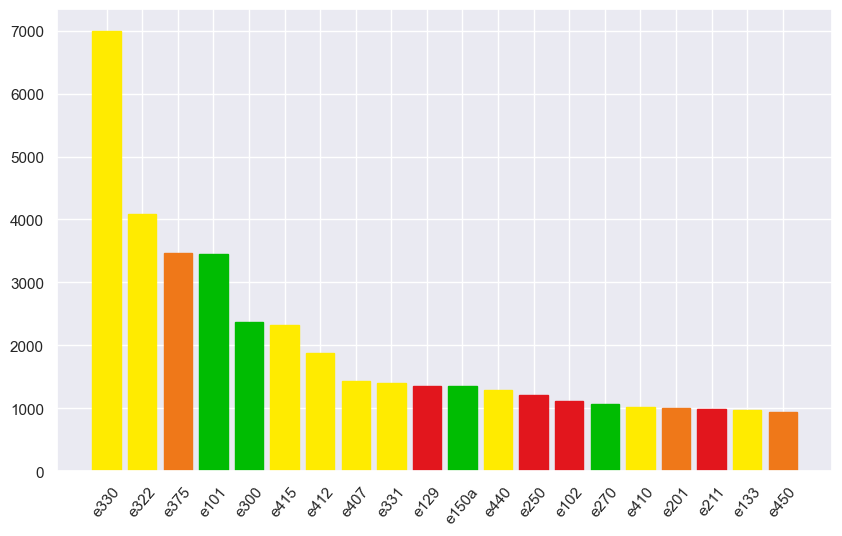

In [24]:
tmp = data['additives_tags'].str.split(',', expand = True).stack().str.replace('en:', '')

tmp = tmp.value_counts()[:20]


bars = plt.bar(list(tmp.index), tmp.values)
plt.xticks(rotation=50)

couleurAdditifs = ['', '#00bc02', '#FFEB00', '#ef7819', '#e2161d']
for i, bar in enumerate(bars):
    a = tmp.index[i]
    if a not in listeAdditifs:
        a = 'e666'
    bar.set_color(couleurAdditifs[listeAdditifs[a]])

plt.show()

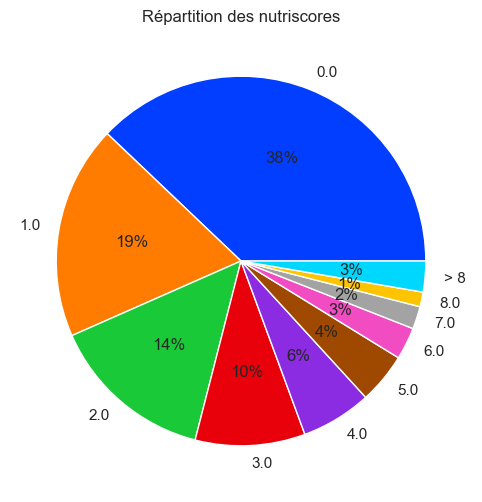

In [25]:
limit = 8

tmp = data['additives_n'].value_counts()

s = sum(tmp[limit+1:])
tmp = tmp[:limit]
tmp['> '+str(limit)] = s

palette_color = sns.color_palette('bright')

plt.pie(tmp.values, labels=tmp.index, colors=palette_color, autopct='%.0f%%')
plt.title("Répartition des nutriscores")
plt.show()

<AxesSubplot: >

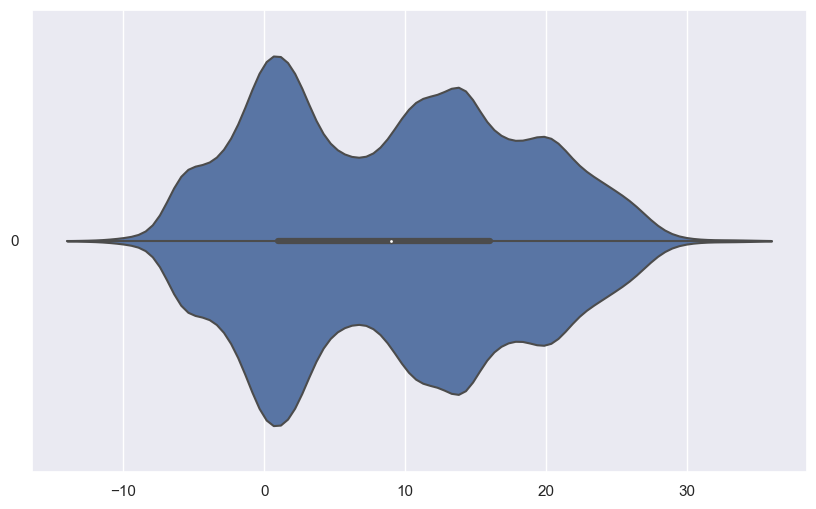

In [26]:
sns.violinplot(data=data['nutrition-score-fr_100g'], orient='h', scale='width', cut=0)

In [27]:
sns.set(rc={"figure.figsize":(10, 20)})

In [28]:
df = data[['fat_100g', 'saturated-fat_100g', 'omega-3-fat_100g',
'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 
'salt_100g', 'sodium_100g', 'fruits-vegetables-nuts_100g']]

<AxesSubplot: >

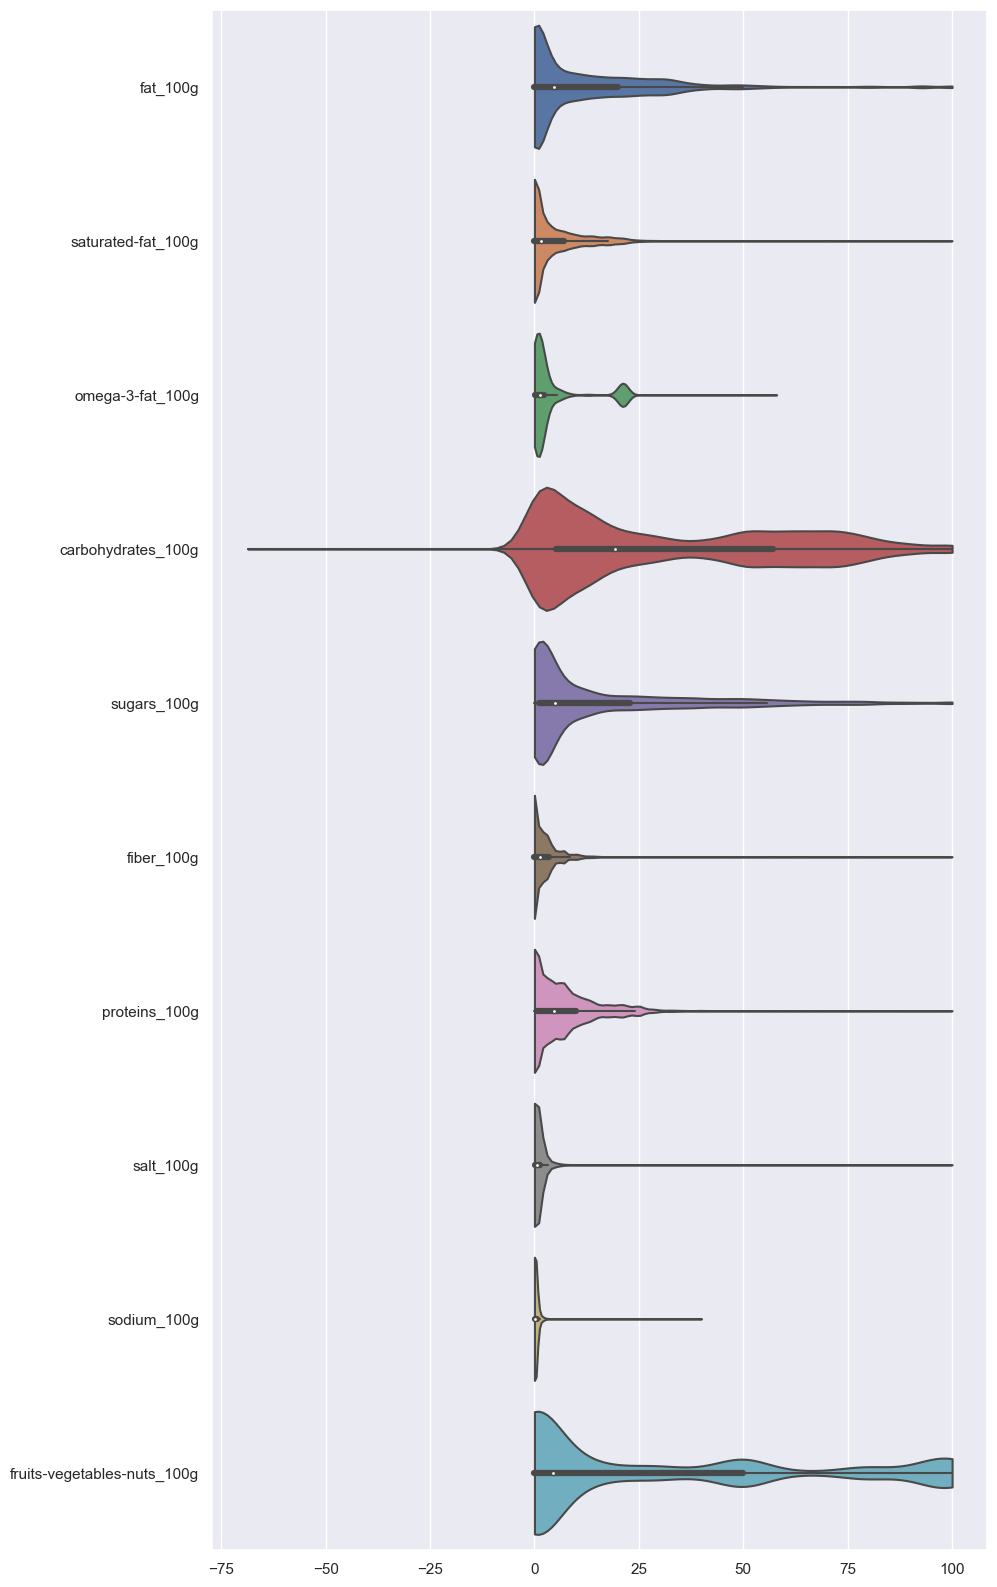

In [29]:
sns.violinplot(data=df, orient='h', scale='width', cut=0)

<AxesSubplot: >

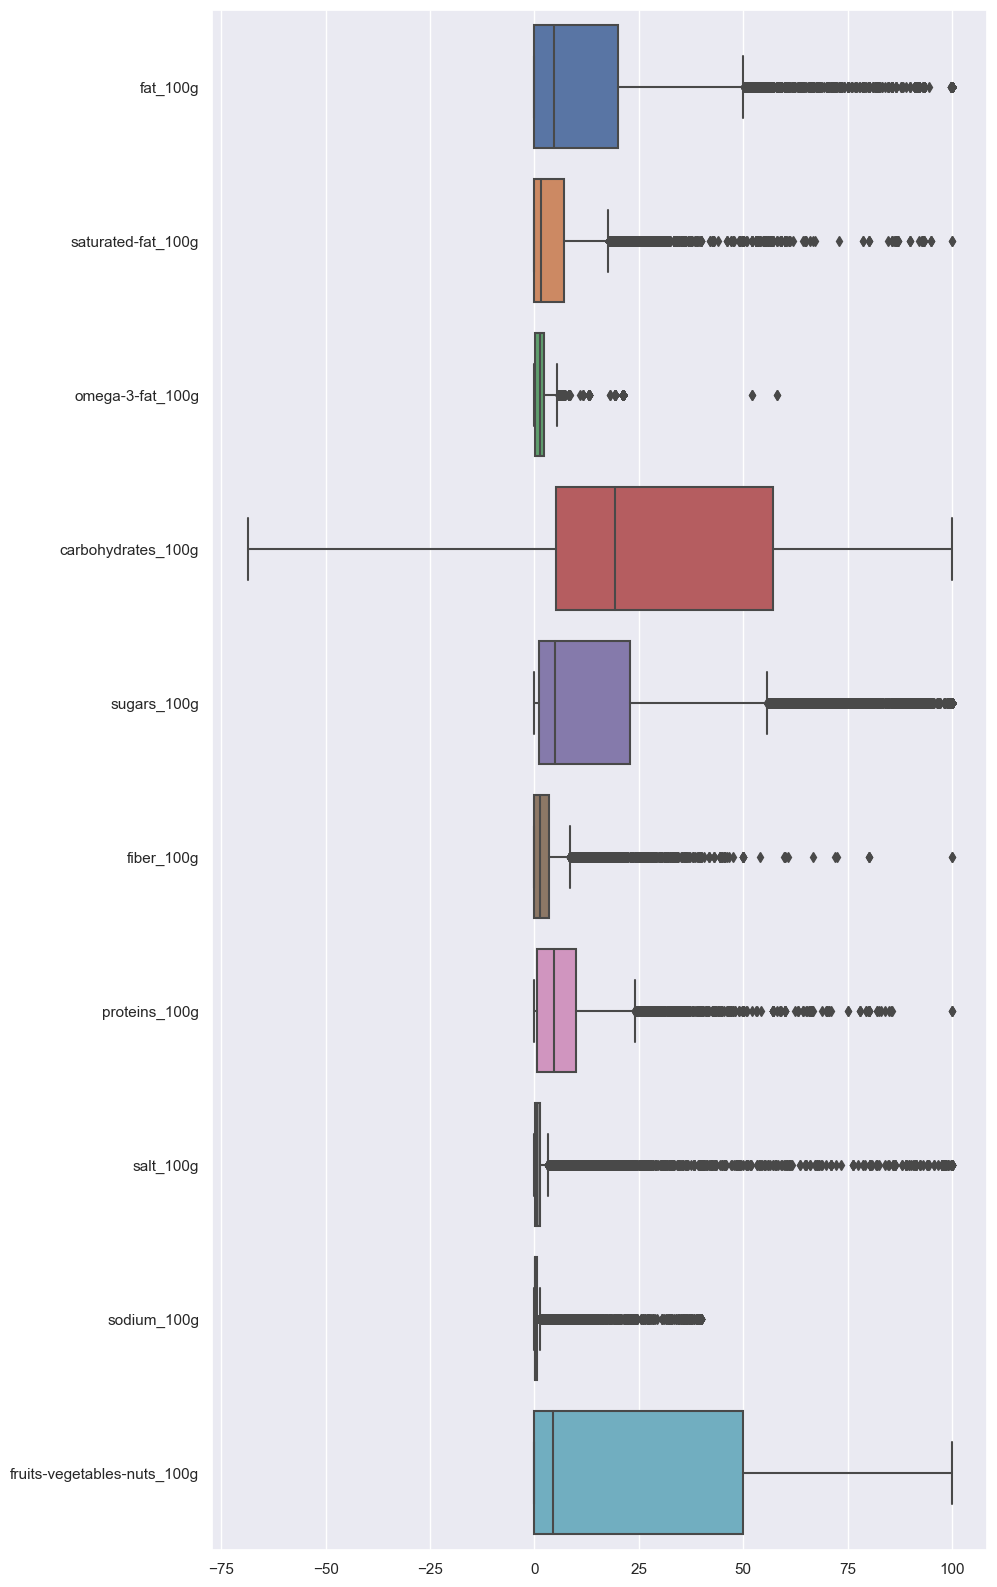

In [30]:
sns.boxplot(data=df, orient='h')

<AxesSubplot: xlabel='nutrition-score-fr_100g', ylabel='Count'>

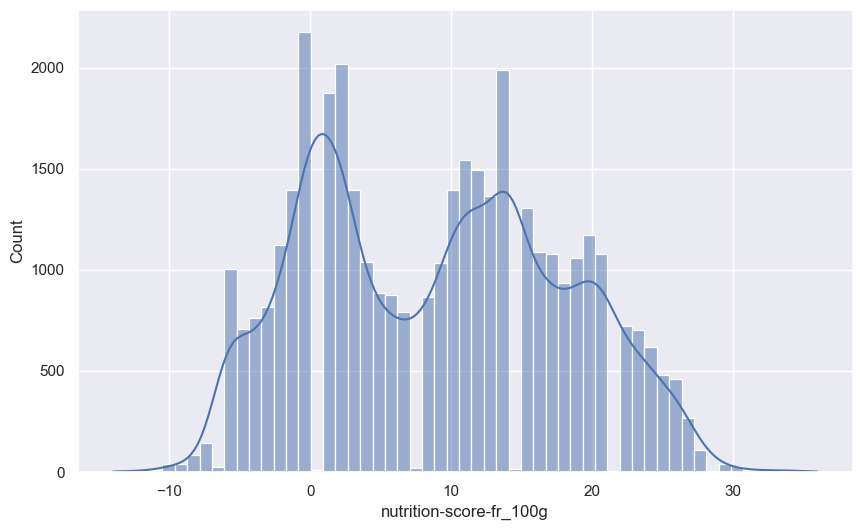

In [31]:
sns.set(rc={"figure.figsize":(10, 6)})
sns.histplot(data=data['nutrition-score-fr_100g'], kde=True)

# Bivariée

In [32]:
%matplotlib inline
sns.set(rc={"figure.figsize":(8, 6)})

In [33]:
@interact
def show_articles_more_than(x=widgets.Dropdown(options=listeColFloat, value='fat_100g'),
                            y=widgets.Dropdown(options=listeColFloat, value='saturated-fat_100g'), 
                            couleur=widgets.Dropdown(options=listeColFloat, value='energy_100g')):
    fig = plt.figure()
    ax = plt.axes()

    ax.scatter(data[x], data[y], c=data[couleur], alpha=0.3)

    ax.set_title('3d Scatter plot geeks for geeks')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.show()

interactive(children=(Dropdown(description='x', index=4, options=('additives_n', 'ingredients_from_palm_oil_n'…

In [34]:
nomcolonnes = {'fat_100g':'Lipides', 'saturated-fat_100g':'Graisses saturées', 'energy_100g':'Energie',
              'carbohydrates_100g':'Glucides', 'sugars_100g':'Sucres', 'proteins_100g':'Protéines',
              'nutrition-score-fr_100g':'Nutriscore', 'omega-3-fat_100g':'Omega3', 'fiber_100g':'Fibres',
              'salt_100g':'Sel', 'sodium_100g':'Sodium', 'fruits-vegetables-nuts_100g':'Fruits, legumes et noix',
              'additives_n':"Nombre d'additifs", 'ingredients_from_palm_oil_n':"Nombre d'ingrédients palmiques",
              'ingredients_that_may_be_from_palm_oil_n':"Nombre d'ingrédients possiblement palmiques",
              'nutrition_grade_fr':'Classement Nutriscore'}

In [35]:
listeScatter = pd.DataFrame([['fat_100g', 'saturated-fat_100g', 'energy_100g', None],
                             ['carbohydrates_100g', 'sugars_100g', 'energy_100g', None],
                             ['fat_100g', 'proteins_100g', 'energy_100g', None],
                             ['fat_100g', 'proteins_100g', 'nutrition-score-fr_100g', None],
                             ['proteins_100g', 'carbohydrates_100g', 'nutrition-score-fr_100g', None],
                             ['fat_100g', 'carbohydrates_100g', 'nutrition-score-fr_100g', None],
                             ['salt_100g', 'sodium_100g', '', None],
                             ['nutrition-score-fr_100g', 'energy_100g', '', None]], columns=['x', 'y', 'c', 'title'])

listeScatter['title'] = listeScatter['x'] + ' * ' + listeScatter['y'] + ' - ' + listeScatter['c']

listeInteract = []

for i in listeScatter.index:
    listeInteract += [(listeScatter.loc[i, 'title'], i)]

In [36]:
@interact
def show_articles_more_than(graphique=widgets.Dropdown(options=listeInteract)):
    x = listeScatter.loc[graphique, 'x']
    y = listeScatter.loc[graphique, 'y']
    c = listeScatter.loc[graphique, 'c']
    if c != '':
        cNom = nomcolonnes[c]
        c = data[c]
    else:
        cNom = ''
        c = 'b'
    t = listeScatter.loc[graphique, 'title']
    
    fig = plt.figure()
    ax = plt.axes()

    sc = ax.scatter(data[x], data[y], c=c, alpha=1)
    ax.scatter(data[x], data[y], c=c, alpha=0.3)

    ax.set_title(listeScatter.loc[graphique, 'title'])
    ax.set_xlabel(nomcolonnes[x])
    ax.set_ylabel(nomcolonnes[y])
    
    
    #legend
    if cNom != '':
        cb = fig.colorbar(sc, ax=ax)
        cb.set_label(cNom)
    
    
    plt.show()

interactive(children=(Dropdown(description='graphique', options=(('fat_100g * saturated-fat_100g - energy_100g…

In [37]:
%matplotlib notebook

<IPython.core.display.Javascript object>


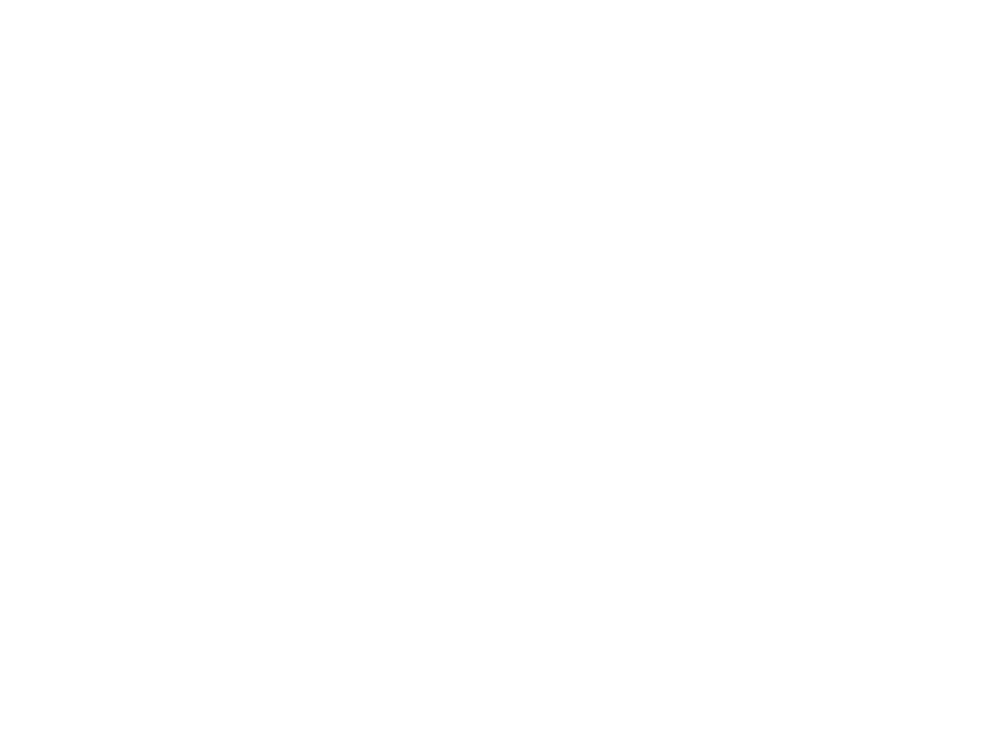

In [38]:
fig = plt.figure()
ax = plt.axes(projection="3d")

#energy_100g
sc = ax.scatter(data['fat_100g'], data['carbohydrates_100g'], data['proteins_100g'], c=data['nutrition-score-fr_100g'], alpha=1, s=0)
ax.scatter(data['fat_100g'], data['carbohydrates_100g'], data['proteins_100g'], c=data['nutrition-score-fr_100g'], alpha=0.1, s=7)

ax.set_title('3d Scatter plot geeks for geeks')
ax.set_xlabel('Lipides')
ax.set_ylabel('Glucides')
ax.set_zlabel('Proteines')

cb = fig.colorbar(sc, ax=ax)
cb.set_label('Nutriscore')

plt.show()

In [39]:
%matplotlib inline

In [40]:
listeColNum = data.dtypes.loc[data.dtypes != 'object'].index[2:].to_list()

<AxesSubplot: >

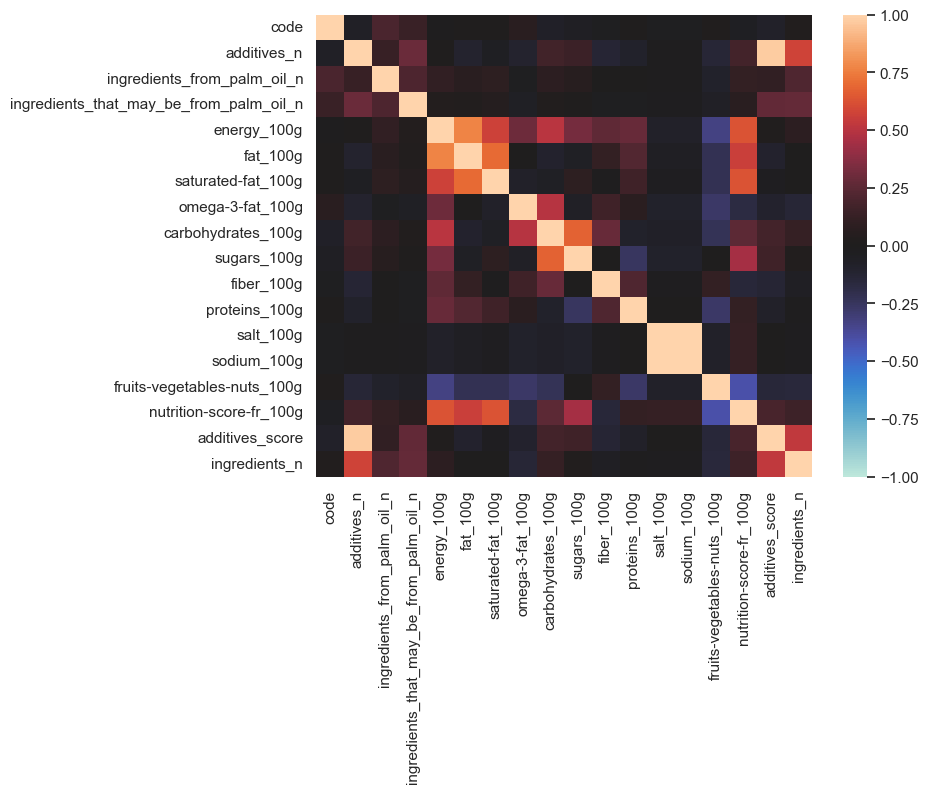

In [41]:
sns.heatmap(data[listeColNum].corr(), vmin=-1, vmax=1, center=0)

In [42]:
from sklearn import preprocessing

In [43]:
listeColNonFloat = [c for c in data.columns if c not in listeColFloat]

In [44]:
dataTmp = data.copy()

In [45]:
label_encoder = preprocessing.LabelEncoder()

In [46]:
for c in [c for c in data.columns if c not in listeColFloat]:
    dataTmp[c] = label_encoder.fit_transform(dataTmp[c].astype(str))

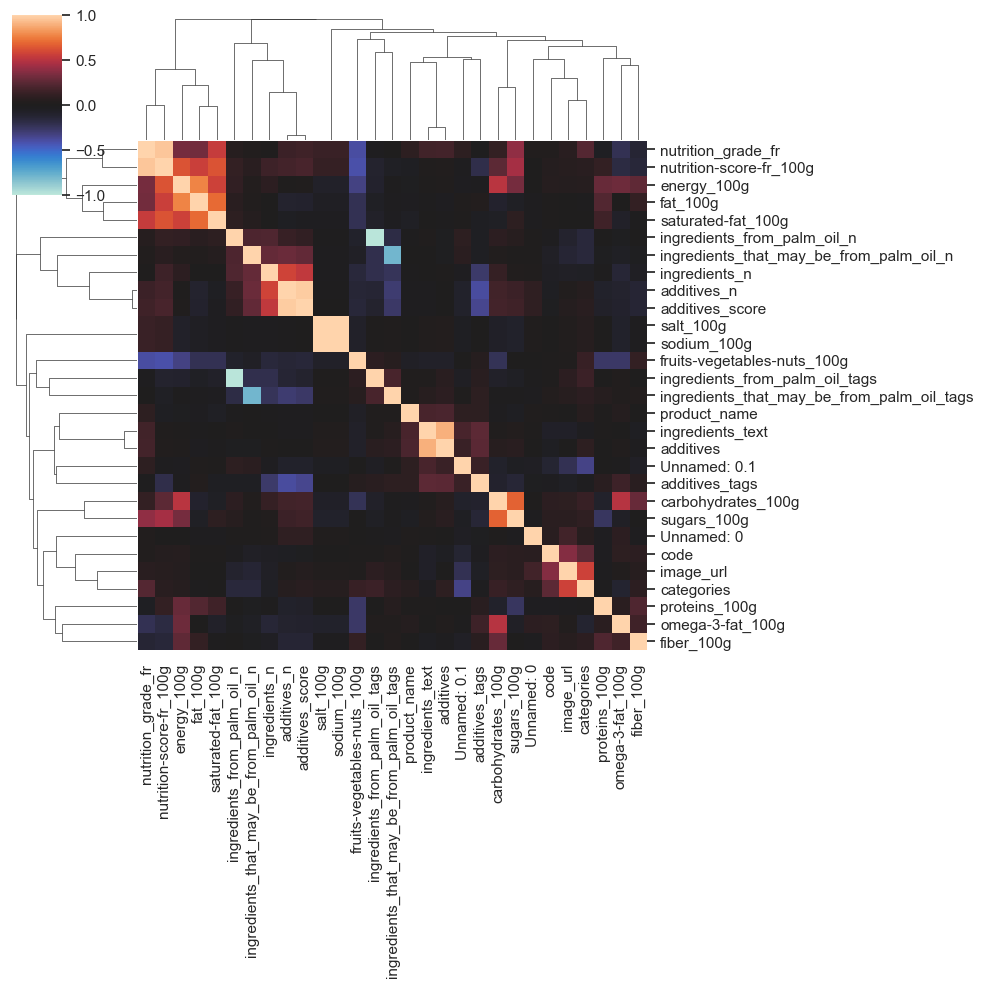

In [47]:
sns.clustermap(dataTmp.corr(), vmin=-1, vmax=1, center=0)

In [48]:
%matplotlib inline

In [49]:
nbVals = 15

In [50]:
dataFrequent = data.loc[data["categories"].isin(data['categories'].value_counts()[:nbVals].index.to_list())]

In [51]:
sns.set(rc={"figure.figsize":(10, 12)})

In [52]:
@interact
def show_articles_more_than(x=widgets.Dropdown(options=listeColFloat, value='fat_100g')):
    #ax = sns.stripplot(data=dataFrequent, x=x, y="categories", hue="nutrition-score-fr_100g", orient='h', alpha=0.3)
    ax = sns.boxplot(data=dataFrequent, x=x, y="categories", orient='h')
    
    ax.set(xlabel=nomcolonnes[x],
           ylabel='Catégorie',
           title='Boxplot des ' + nomcolonnes[x] + ' pour les ' + str(nbVals) + ' catégories les plus fréquentes')
    
    plt.show()

interactive(children=(Dropdown(description='x', index=4, options=('additives_n', 'ingredients_from_palm_oil_n'…

# PCA

In [53]:
sns.set(rc={"figure.figsize":(10, 6)})

In [54]:
from sklearn.decomposition import PCA, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

In [55]:
scaler = StandardScaler()

In [56]:
listeColNum = listeColFloat.copy()

In [57]:
listeColNum.remove('sodium_100g')
#listeColNum.remove('sugars_100g')
listeColNum.remove('omega-3-fat_100g')
#listeColNum.remove('saturated-fat_100g')
listeColNum.remove('additives_n')
listeColNum.remove('ingredients_from_palm_oil_n')
listeColNum.remove('ingredients_that_may_be_from_palm_oil_n')
listeColNum.remove('fruits-vegetables-nuts_100g')
listeColNum

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'nutrition-score-fr_100g',
 'additives_score',
 'ingredients_n']

In [58]:
dataPCA = data[listeColNum]

In [59]:
dataPCA = SimpleImputer(missing_values=np.nan, strategy='mean').fit(dataPCA).transform(dataPCA)

In [60]:
X_scaled = scaler.fit_transform(dataPCA)

In [61]:
pd.DataFrame(X_scaled).describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.50,-0.79,-0.72,-3.77,-0.80,-0.70,-0.92,-0.27,-2.93,-0.84,-1.17
25%,-0.89,-0.76,-0.70,-0.91,-0.71,-0.70,-0.78,-0.25,-0.76,-0.84,-0.65
50%,-0.00,-0.16,-0.19,-0.00,-0.32,0.00,-0.12,-0.13,-0.00,-0.06,0.00
75%,0.64,0.22,0.00,0.75,0.06,0.03,0.25,0.00,0.64,0.13,0.29
max,3.61,5.49,13.67,2.60,4.37,26.54,12.18,16.87,3.45,10.57,24.34


In [62]:
n_components = 6

In [63]:
pca = PCA(n_components=n_components)

In [64]:
pca.fit(X_scaled)

PCA(n_components=6)

In [65]:
(pca.explained_variance_ratio_*100).round(2)

array([27.43, 17.99, 13.48, 11.36,  9.16,  6.59])

In [66]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = listeColNum
pcs.index = [f"F{i}" for i in range(1, n_components+1)]


<AxesSubplot: >

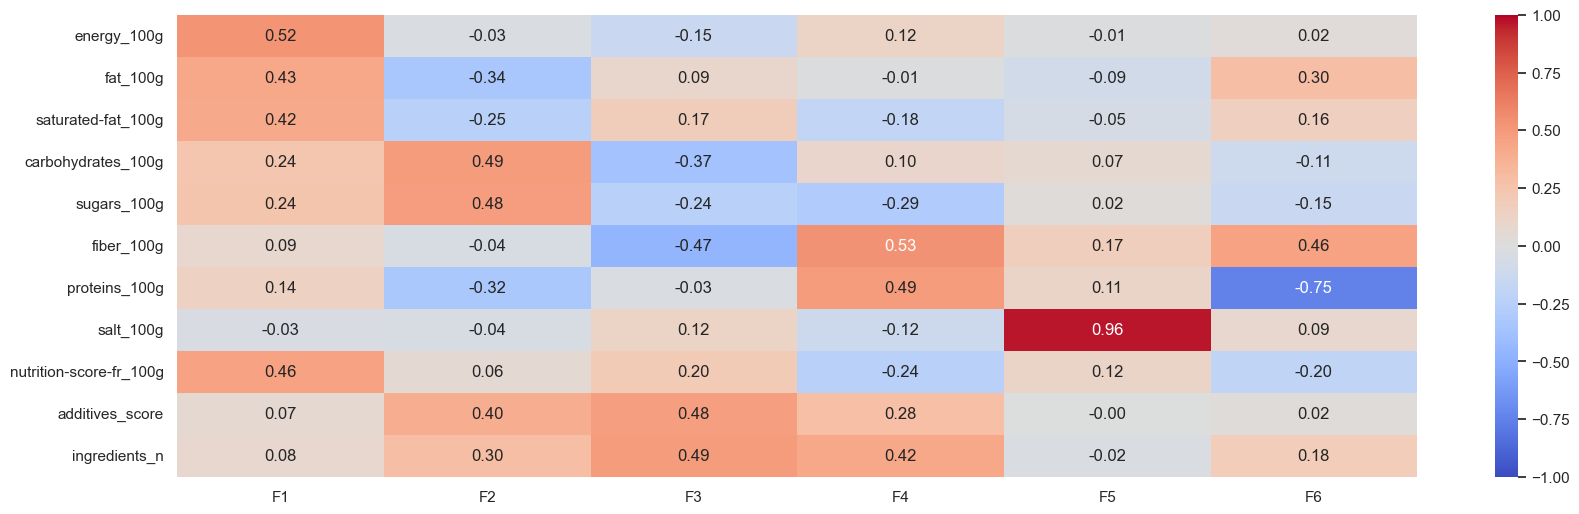

In [67]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

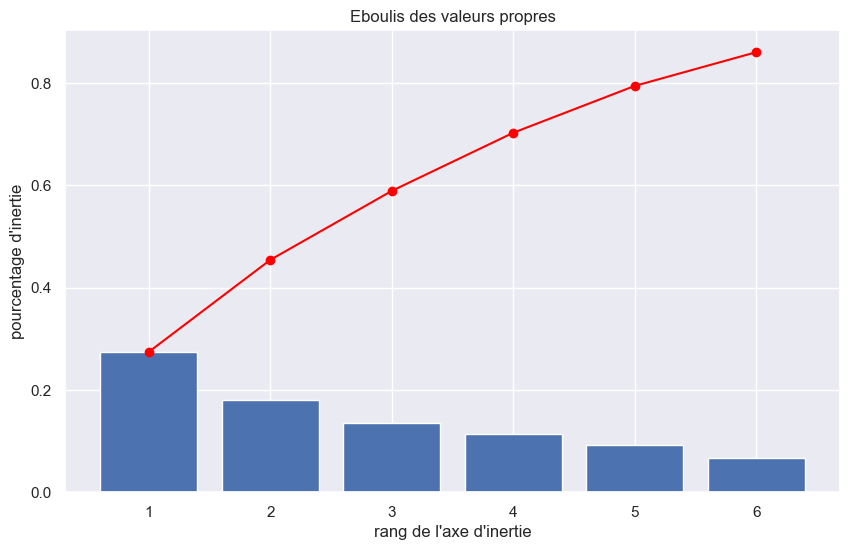

In [68]:
plt.bar(range(1, n_components+1), pca.explained_variance_ratio_)
plt.plot(range(1, n_components+1), pca.explained_variance_ratio_.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [69]:
x, y = 0,1
#x, y = 2,3

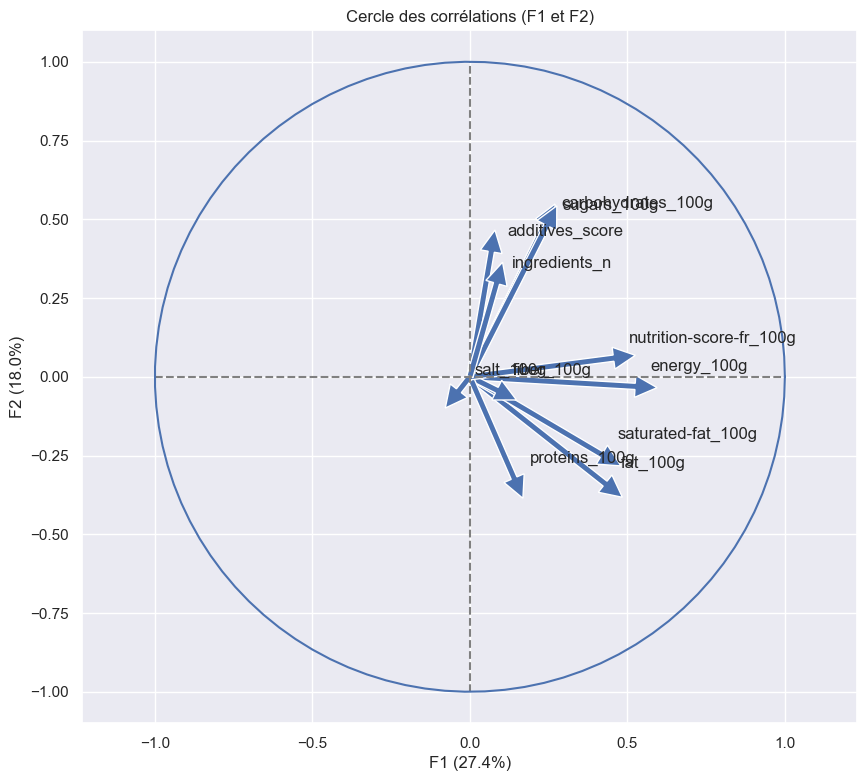

In [70]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[x, i],  #0 for PC1
             pca.components_[y, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[x, i] + 0.05,
             pca.components_[y, i] + 0.05,
             listeColNum[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

In [71]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                s=10,
                                figsize=[10,8], 
                                marker="."):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, alpha=alpha, s=s)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

In [72]:
X_proj = pca.transform(X_scaled)

In [73]:
x_y = [0,1]

@interact
def show_articles_more_than(x=widgets.Dropdown(options=listeColFloat, value='fat_100g')):
    
    display_factorial_planes(X_proj, x_y, clusters=data[x], alpha=0.3, s=4)

interactive(children=(Dropdown(description='x', index=4, options=('additives_n', 'ingredients_from_palm_oil_n'…

In [74]:
import random

In [75]:
@interact
def show_articles_more_than(couleur=widgets.Dropdown(options=listeColFloat, value='fat_100g'), nb=(0,30)):
    r = random.sample(range(len(data)), nb)
    tmp = data.iloc[r].fillna('NaN')['product_name'].values
    display_factorial_planes(X_proj[r], x_y, pca, figsize=(20,16), labels=tmp, clusters=data.iloc[r][couleur], marker="o", s=100)

interactive(children=(Dropdown(description='couleur', index=4, options=('additives_n', 'ingredients_from_palm_…

# ANOVA

In [76]:
import pingouin as pg

In [77]:
pg.pairwise_corr(data, columns=listeColNum, method='pearson')

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,energy_100g,fat_100g,pearson,two-sided,41087,0.767274,"[0.76, 0.77]",0.000000e+00,inf,1.000000
1,energy_100g,saturated-fat_100g,pearson,two-sided,39158,0.564130,"[0.56, 0.57]",0.000000e+00,inf,1.000000
2,energy_100g,carbohydrates_100g,pearson,two-sided,41044,0.502294,"[0.5, 0.51]",0.000000e+00,inf,1.000000
3,energy_100g,sugars_100g,pearson,two-sided,41593,0.327837,"[0.32, 0.34]",0.000000e+00,inf,1.000000
4,energy_100g,fiber_100g,pearson,two-sided,37683,0.265329,"[0.26, 0.27]",0.000000e+00,inf,1.000000
5,energy_100g,proteins_100g,pearson,two-sided,43353,0.285711,"[0.28, 0.29]",0.000000e+00,inf,1.000000
6,energy_100g,salt_100g,pearson,two-sided,43075,-0.080942,"[-0.09, -0.07]",1.565970e-63,1.813e+59,1.000000
7,energy_100g,nutrition-score-fr_100g,pearson,two-sided,38083,0.625848,"[0.62, 0.63]",0.000000e+00,inf,1.000000
8,energy_100g,additives_score,pearson,two-sided,38186,0.022370,"[0.01, 0.03]",1.232624e-05,90.589,0.992067
9,energy_100g,ingredients_n,pearson,two-sided,38183,0.082200,"[0.07, 0.09]",3.048229e-58,1.034e+54,1.000000
